### Scalar field cosmology

In this notebook, we introduce the simplest scalar field cosmology, dubbed $quintessence$. In this simple example, the Universe's expansion (represented by a nonvanishing Hubble parameter $H$) is sourced only by a scalar field $\phi$, a theoretical device that we typically use to study dark energy.

The Friedmann equation is then
\begin{equation}
3 M_\text{pl}^2 H^2 = V(\phi) + \frac{\dot{\phi}^2}{2} .
\end{equation}
On the other hand, the equation of motion for the scalar field is 
\begin{equation}
\ddot{\phi} + 3 H \dot{\phi} + V' \left( \phi \right) = 0 .
\end{equation}
Incidentally, this looks just like the equation of motion for a ball, with coordinate $x$, rolling in a conservative potential $V(x)$ with a time dependent friction force $-b(t) \dot{x}$. For the rest of this notebook, we consider only the quadratic potential
\begin{equation}
V(\phi) = \frac{m}{2} \phi^2 ,
\end{equation}
which could stand for an inflaton of mass $m$. Admittedly, this is far from the most realistic model, but it gets things done for a student. 

So, we now integrate the field equations (those two equations above). To do this, we eliminate $H$ from scalar field equation using the . In doing this, we obtain
\begin{equation}
\ddot{\phi} + \frac{\sqrt{3}}{M_\text{pl}} \left( V(\phi) + \frac{\dot{\phi}^2}{2} \right)^{1/2} \dot{\phi} + V' \left( \phi \right) = 0 .
\end{equation}
We then solve this first and then put the result into the Friedmann equation to obtain the scale factor $a(t)$. Then, we use the solution to integrate the Friedmann equation.

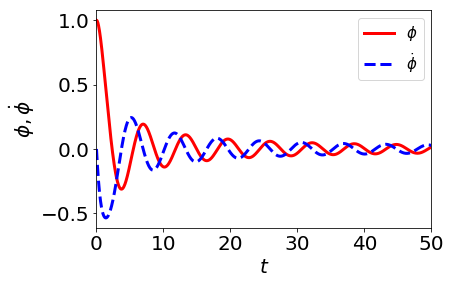

In [2]:
import numpy as np
from pylab import *
from scipy.integrate import odeint

# we set Planck mass to unity

x_initial = np.array([1., 0.])
t_space = np.linspace(0., 50., 1000)

def f(x, t):
    '''the scalar field ode'''
    return np.array([ x[1] , -np.sqrt(3)*np.sqrt( 0.5*(x[0]**2.) + 0.5*(x[1]**2.) )*x[1] - x[0] ])

inflaton = odeint(f, x_initial, t_space)

phi = inflaton[:, 0]
phi_prime = inflaton[:, 1]

# plots inflaton field and its derivative

rc('xtick', labelsize = 20)
rc('ytick', labelsize = 20)

plot(t_space, phi, 'r-', linewidth = 3.0, label = r'$\phi$')
plot(t_space, phi_prime, 'b--', linewidth = 3.0, label = r'$\dot{\phi}$')
xlim(min(t_space), max(t_space))
xlabel(r'$t$', fontsize = 20)
ylabel(r'$\phi,\dot{\phi}$', fontsize = 20)
legend(loc = 'upper right', prop = {'size': 15})
show()

Thus, we see that the field $\phi$ would oscillate simply about the equilibrium of the potential $V(\phi)$, just as a rolling ball, while friction throws away its energy, thus, the decreasing amplitude. 

The expansion history sourced by this rolling field $\phi$ is obtained as follows. We construct a function $V\left( \phi \right) + \dot{\phi}^2/2$ out of the inflaton solution and then integrate the Friedmann equation for the scale factor, noting that $H = \dot{a}/a$.

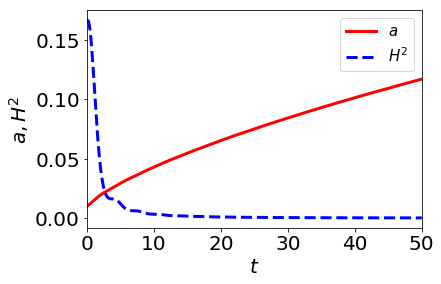

In [3]:
def H_squared(t):
    '''Friedmann equation right hand side
    the input t must be within the range of integration'''
    abs_difference = abs( t - t_space )
    ind = list(abs_difference).index(min(abs_difference))
    
    return 0.5*(phi[ind]**2.) + 0.5*(phi_prime[ind]**2.)

def g(y, t):
    '''ode for the scale factor'''
    return np.array([ np.sqrt(H_squared(t)/3)*y[0] ])

a_initial = np.array([0.01]) # initial condition on scale factor at t = 0

scale_factor = odeint(g, a_initial, t_space)

a = scale_factor[:, 0]

# plots solution

H_sq_list = []
for each in t_space:
    H_sq_list.append(H_squared(each)/3.)
H_sq_array = np.array(H_sq_list) # construct array version of H^2

plot(t_space, a, 'r-', linewidth = 3.0, label = r'$a$')
plot(t_space, H_sq_array, 'b--', linewidth = 3.0, label = r'$H^2$')
xlim(min(t_space), max(t_space))
xlabel(r'$t$', fontsize = 20)
ylabel(r'$a,H^2$', fontsize = 20)
legend(loc = 'upper right', prop = {'size': 15})
show()

This shows us that the field $\phi$ would indeed source an expanding Universe, but it can't continue this work by itself. The expansion would slow down or decelerate, $\ddot{a} < 0$. In practice, a bunch of cosmic ingredients (radiation, baryons, dark matter, dark energy) should help out to support the observed expansion history.